# Radar / Spider chart plot function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## utils - fixed

In [2]:
def scale_transform_skip_inner_most_ring(original_scale, my_data):
    """
    original_scale: i.e., [1,2,3,4,5] -> (1, 5) -> (2, 5), skip inner most ring
    my_scale: i.e., [0.15, 0.15, 0.17, 0.16, 0.22, 0.15] -> (0.22, 0.15), reverse order
    """
    original_scale_min = original_scale[1] # skip inner most ring
    original_scale_max = original_scale[-1]
    
    original_range = original_scale_max - original_scale_min  # 5 - 2 = 3
    my_range = max(my_data) - min(my_data)

    # large is better, reverse scaling
    my_data_scaled = -1.0 * (original_range/my_range) * (my_data - min(my_data)) + original_scale_max
    my_scale = -1.0 * (my_range / original_range) * (original_scale - original_scale_min) + max(my_data)
    
    
    return (my_scale, my_data_scaled)

## radar plot class - fixed

In [3]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.num_rings = len(labels[0])
        self.angles = np.arange(0, 360, 360.0/self.n)

        # rotate the angles of all axies by 90 degress
        self.angles = self.angles + 90
        self.angles = [a if a < 360.0 else a - 360 for a in self.angles]
    
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]    
        self.ax = self.axes[0]
        self.ax.tick_params(pad=60)
        # self.ax.set_thetagrids(self.angles, labels=title, fontsize=15)
        self.ax.set_thetagrids(self.angles)
        

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, self.num_rings + 1), angle=angle, labels=label, fontsize=20)            
            # ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, self.num_rings)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.fill(angle, values, *args, color=kw['color'],alpha=kw['alpha']*0.05)

## polar axes labels - fixed

In [4]:
tit = [
    'Error / ImageNet', 'Severity / ImageNet', 'HD@1 / ImageNet',
    'Error / SUN-324', 'Severity / SUN-324', 'HD@1 / SUN-324',
    'Error / CUB-200', 'Severity / CUB-200', 'HD@1 / CUB-200',
    'Error / UCF-101', 'Severity / UCF-101', 'HD@1 / UCF-101',
    'Error / Food-101', 'Severity / Food-101', 'HD@1 / Food-101', 
]

## actual evaluation metrics data - modifiable
- top@1 accuracy is converted to top@1 error rate

In [5]:
# HieT - HieComp + tree
# HieC - HieComp + cluster
legends = [
    'CLIP', 'CRM', 'CuPL',
    'VCD', 'HieC', 'HieT',
    'Ours',
]

colors = [
    'red', 'green', 'purple',
    'orange', 'gray', 'hotpink',
    'blue',
]

markers = [
    '-<', '->', '-^',
    '-v', '-x', '-P',
    '-s',
]

# food-101
data_1 = [
    [100 - 93.86, 2.45, 0.15], # CLIP
    [100 - 93.87, 2.42, 0.15], # CRM
    [100 - 93.06, 2.42, 0.17], # CuPL
    [100 - 93.65, 2.46, 0.16], # VCD
    [100 - 92.44, 2.83, 0.21], # HieC-0.3
    [100 - 92.33, 2.82, 0.22], # HieT-0.5
    [100 - 93.86, 2.42, 0.15], # ours-full
]
data_1 = np.transpose(np.array(data_1))

# ucf-101
data_2 = [
    [100 - 77.50, 1.59, 0.36], # CLIP
    [100 - 77.37, 1.57, 0.36], # CRM
    [100 - 77.21, 1.68, 0.38], # CuPL
    [100 - 75.81, 1.61, 0.39], # VCD
    [100 - 76.26, 1.61, 0.38], # HieC-0.7
    [100 - 77.08, 1.58, 0.36], # HieT-0.3
    [100 - 79.78, 1.59, 0.32], # ours-full
]
data_2 = np.transpose(np.array(data_2))

# cub-200
data_3 = [
    [100 - 62.93, 1.22, 0.45], # CLIP
    [100 - 63.05, 1.20, 0.44], # CRM
    [100 - 66.98, 1.21, 0.40], # CuPL
    [100 - 64.89, 1.22, 0.43], # VCD,
    [100 - 55.61, 1.69, 0.75], # HieC-0.7
    [100 - 56.09, 1.69, 0.74], # HieT-0.4
    [100 - 66.90, 1.19, 0.40], # ours-full
]
data_3 = np.transpose(np.array(data_3))

# sun-324
data_4 = [
    [100 - 70.08, 1.66, 0.50], # CLIP
    [100 - 70.28, 1.60, 0.48], # CRM
    [100 - 73.17, 1.54, 0.41], # CuPL
    [100 - 71.94, 1.61, 0.45], # VCD
    [100 - 72.91, 1.61, 0.44], # HieC-0.6
    [100 - 73.41, 1.58, 0.42], # HieT-0.3
    [100 - 74.78, 1.55, 0.39], # ours-full
]
data_4 = np.transpose(np.array(data_4))

data_5 = [
    [100 - 76.58, 5.46, 1.28], # CLIP
    [100 - 76.46, 5.39, 1.27], # CRM
    [100 - 76.53, 5.42, 1.27], # CuPL
    [100 - 76.76, 5.45, 1.27], # VCD
    [100 - 68.46, 7.11, 2.24], # HieC-0.6
    [100 - 68.65, 7.09, 2.22], # HieT-0.3
    [100 - 77.12, 5.38, 1.23], # ours-full
]
data_5 = np.transpose(np.array(data_5))

data = np.concatenate([data_5, data_4, data_3, data_2, data_1], axis=0)

## setup original scales for rings, and its annotation labels - fixed

In [6]:
original_scale = np.array([1,2,3,4,5])

# get ring label annotations
ring_scale = [scale_transform_skip_inner_most_ring(original_scale, l)[0] for l in data]

ring_label = []
for l in ring_scale:
    tp = [f'{x:.2f}' for x in l]

    # set inner most ring with empty label
    # remove other labels and only keep labels for rings
    # corresponding to the smallest and largest data in the polar axes
    tp[0] = tp[2] = tp[3] = ' '
    tp.append(' ') # append empty label for outer most ring
    ring_label.append(tp)
ring_label

[[' ', '31.54', ' ', ' ', '22.88', ' '],
 [' ', '7.11', ' ', ' ', '5.38', ' '],
 [' ', '2.24', ' ', ' ', '1.23', ' '],
 [' ', '29.92', ' ', ' ', '25.22', ' '],
 [' ', '1.66', ' ', ' ', '1.54', ' '],
 [' ', '0.50', ' ', ' ', '0.39', ' '],
 [' ', '44.39', ' ', ' ', '33.02', ' '],
 [' ', '1.69', ' ', ' ', '1.19', ' '],
 [' ', '0.75', ' ', ' ', '0.40', ' '],
 [' ', '24.19', ' ', ' ', '20.22', ' '],
 [' ', '1.68', ' ', ' ', '1.57', ' '],
 [' ', '0.39', ' ', ' ', '0.32', ' '],
 [' ', '7.67', ' ', ' ', '6.13', ' '],
 [' ', '2.83', ' ', ' ', '2.42', ' '],
 [' ', '0.22', ' ', ' ', '0.15', ' ']]

## scale my evaluation metrics data to fit the radar plot ring scales - fixed

In [7]:
data_scale = [scale_transform_skip_inner_most_ring(original_scale, l)[1] for l in data]

data_scale_T = np.transpose(data_scale)

## plot radar chart - test set
- need to replace the degrees annotation of each polar axis with manual labels

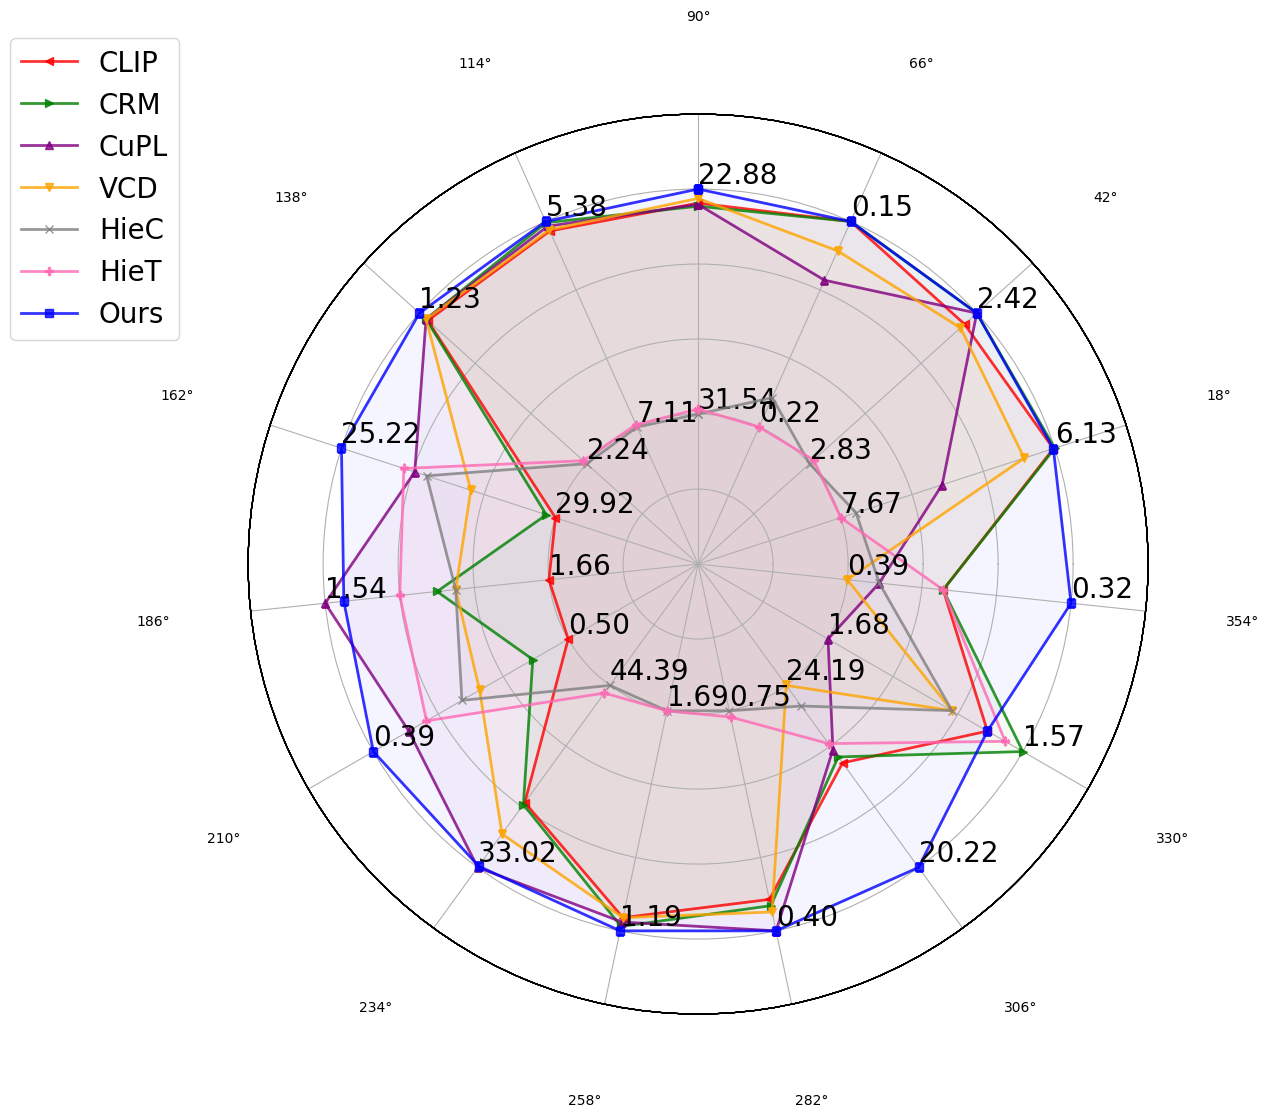

In [8]:
fig = plt.figure(figsize=(10,10))
radar = Radar(fig, tit, ring_label)



for k, le in enumerate(legends):
    radar.plot(data_scale_T[k], markers[k], lw=2, color=colors[k], alpha=0.8, label=le)

radar.ax.legend(loc='upper left', bbox_to_anchor=(-0.28, 0.0, 0.0, 1.1), fontsize=20)